In [1]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4

In [2]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 0.11.3
    Uninstalling torchmetrics-0.11.3:
      Successfully uninstalled torchmetrics-0.11.3
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.9.4
    Uninstalling pytorch-lightning-1.9.4:
      Successfully uninstalled pytorch-lightning-1.9.4


In [7]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import pickle
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

**Loading the dataset**

In [24]:
df = pd.read_csv('Karimnagar.csv')
df.drop_duplicates(subset=None, inplace=True)
df.tail()

,district,date,min-temp,max-temp
1339,Karimnagar,2022-12-27,22.60,32.58
1340,Karimnagar,2022-12-28,23.00,34.35
1341,Karimnagar,2022-12-29,23.05,36.23
1342,Karimnagar,2022-12-30,22.30,34.40
1343,Karimnagar,2022-12-31,21.25,35.25


In [25]:
df.date.unique()

array(['2019-01-01', '2019-01-02', '2019-01-03', ..., '2022-12-29',
       '2022-12-30', '2022-12-31'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1344 non-null   object 
 1   date      1344 non-null   object 
 2   min-temp  1344 non-null   float64
 3   max-temp  1344 non-null   float64
dtypes: float64(2), object(2)
memory usage: 42.1+ KB


In [11]:
df.columns

Index(['district', 'date', 'min-temp', 'max-temp'], dtype='object')

In [12]:
df.dtypes

district     object
date         object
min-temp    float64
max-temp    float64
dtype: object

In [13]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,district,date,min-temp,max-temp
1339,Karimnagar,2022-12-27,22.60,32.58
1340,Karimnagar,2022-12-28,23.00,34.35
1341,Karimnagar,2022-12-29,23.05,36.23
1342,Karimnagar,2022-12-30,22.30,34.40
1343,Karimnagar,2022-12-31,21.25,35.25


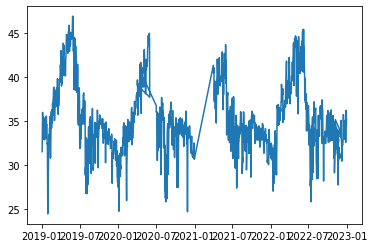

In [14]:
plt.plot(df ['date'], df ['max-temp'])
plt.show()

In [26]:
new_column = df[['date', 'max-temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
1339,2022-12-27,32.58
1340,2022-12-28,34.35
1341,2022-12-29,36.23
1342,2022-12-30,34.40
1343,2022-12-31,35.25


In [21]:
new_column

,ds,y
0,2019-01-01,31.51
1,2019-01-02,33.79
2,2019-01-03,35.99
3,2019-01-04,35.32
4,2019-01-05,35.44
...,...,...
1339,2022-12-27,32.58
1340,2022-12-28,34.35
1341,2022-12-29,36.23
1342,2022-12-30,34.40


In [19]:
new_column.ds.unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', ...,
       '2022-12-29T00:00:00.000000000', '2022-12-30T00:00:00.000000000',
       '2022-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

**Training the forecasting model**

In [27]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=5000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.476% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.476% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

**Forecasting the temperature into the future**

In [29]:
future = n.make_future_dataframe(new_column, periods=370)
forecast = n.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.607% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.607% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equ

Predicting: 42it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-01,None,32.18,35.96,-3.71,-0.07
1,2023-01-02,None,32.24,35.96,-3.73,0.01
2,2023-01-03,None,32.18,35.96,-3.74,-0.04
3,2023-01-04,None,32.32,35.96,-3.76,0.11
4,2023-01-05,None,32.21,35.96,-3.76,0.01


**visualize these predictions**

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


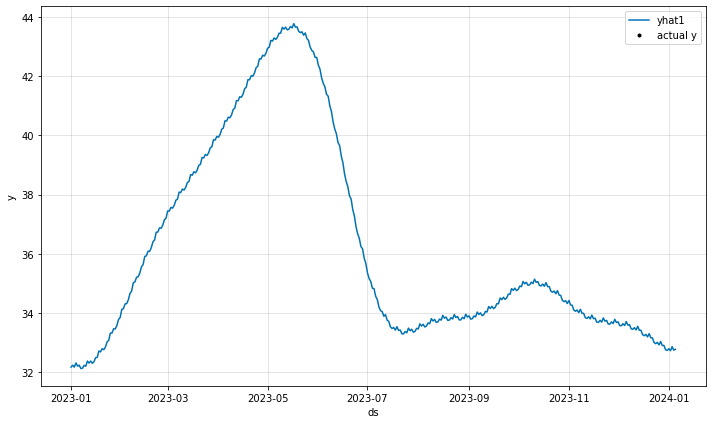

In [33]:
plot = n.plot(forecast)

In [34]:
Karimnagar_forecast = forecast[['ds', 'yhat1']]
Karimnagar_forecast = Karimnagar_forecast[:365]

**Daily_Data_prediction**

In [51]:

data= Karimnagar_forecast[['ds', 'yhat1']] 
data.dropna(inplace=True)
data.columns = ['date', 'max-Temp'] 
data.tail()

,date,max-Temp
360,2023-12-27,33.04
361,2023-12-28,32.91
362,2023-12-29,32.91
363,2023-12-30,32.76
364,2023-12-31,32.74


In [58]:
data.to_csv('Karimnagar2023.csv')

In [57]:
max(data['max-Temp'])

43.76609802246094

**Monthly_Data_prediction**

In [53]:
jan=[]
Feb=[]
Mar=[]
Apr=[]
May=[]
Jun=[]
Jul=[]
Aug=[]
Sep=[]
Oct=[]
Nov=[]
Dec=[]

In [55]:
dict={1:jan,2:Feb,3:Mar,4:Apr,5:May,6:Jun,7:Jul,8:Aug,9:Sep,10:Oct,11:Nov,12:Dec}
for month in range(1,13):
    dict[month].append(data[data['date'].dt.month == month]['max-Temp'])
    

[0    32.18
1    32.24
2    32.18
3    32.32
4    32.21
5    32.24
6    32.13
7    32.14
8    32.24
9    32.21
10   32.38
11   32.31
12   32.38
13   32.31
14   32.36
15   32.49
16   32.51
17   32.72
18   32.69
19   32.80
20   32.76
21   32.85
22   33.03
23   33.07
24   33.32
25   33.33
26   33.47
27   33.46
28   33.58
29   33.78
30   33.85
Name: Temp, dtype: float64]
